In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
import pandas as pd
import os
import panel as pn
pn.extension()

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Input


import kaggle
from PIL import Image

In [11]:
data_folder = '/Users/danaosovtsova/work/neuro/training_dataset'

img_height, img_width = 150, 150
batch_size = 32

In [12]:
# Создание генератора изображений
datagen = ImageDataGenerator(rescale=1./255)  # Нормализация

In [13]:
train_generator = datagen.flow_from_directory(
    data_folder,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  # Множественная классификация
)

Found 250 images belonging to 10 classes.


In [14]:
# Создание модели
model = Sequential([
    Input(shape=(img_height, img_width, 3)),  # Указываем форму входных данных через Input
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')  # Классы
])

In [15]:
# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Обучение модели
model.fit(train_generator, epochs=10)  # Увеличьте количество эпох по необходимости

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - accuracy: 0.3758 - loss: 2.4418
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.7561 - loss: 0.8276
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 0.8327 - loss: 0.4876
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.8553 - loss: 0.3567
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.8850 - loss: 0.5682
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.8774 - loss: 0.3446
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.8964 - loss: 0.3977
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.9508 - loss: 0.1655
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.9634 - loss: 0.1107
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.9516 - loss: 0.1140


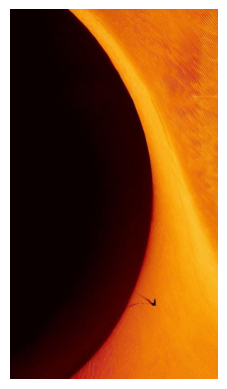

In [38]:
import matplotlib.pyplot as plt

# Задайте путь к изображению
image_path = '/Users/danaosovtsova/work/neuro/myenv/duna.jpg'

# Загрузите изображение
img = plt.imread(image_path)

# Список для хранения координат кликов
click_coordinates = []

# Создаем matplotlib Figure и Axes
fig, ax = plt.subplots()
ax.imshow(img)
ax.axis('off')  # Скрыть оси

# Функция для обработки клика
def onclick(event):
    if event.xdata is not None and event.ydata is not None:
        click_coordinates.append((event.xdata, event.ydata))
        print(f'Координаты клика: ({event.xdata:.2f}, {event.ydata:.2f})')

# Подключаем обработчик кликов
fig.canvas.mpl_connect('button_press_event', onclick)

# Отображаем изображение
plt.show()

<Figure size 640x480 with 0 Axes>

Все координаты кликов: []


In [43]:
def predict_color(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # Нормализация
    img_array = np.expand_dims(img_array, axis=0)  # Добавляем размерность

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])  # Получаем индекс класса
    color_name = list(train_generator.class_indices.keys())[predicted_class]  # Название цвета
    return color_name

color_name = predict_color(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [48]:
def open_image(file_path):
    current_image_path = file_path
    img = plt.imread(file_path)
    ax.imshow(img)
    ax.set_title('Click to predict color')
    plt.draw()

color_name = open_image(image_path)

<Figure size 640x480 with 0 Axes>

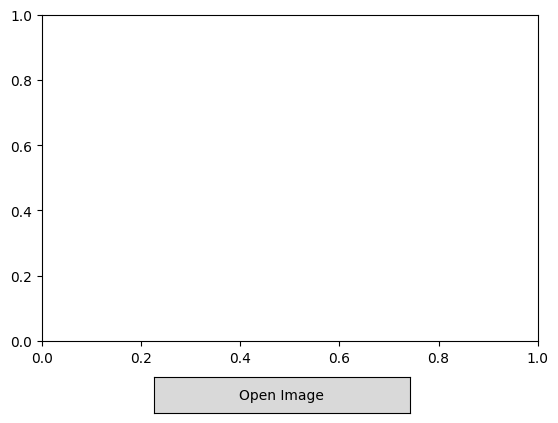

In [54]:
def setup_plot():
        fig, ax = plt.subplots()
        plt.subplots_adjust(bottom=0.2)
        button_ax = plt.axes([0.3, 0.05, 0.4, 0.075])
        button = Button(button_ax, 'Open Image')
        button.on_clicked(load_image)
        cid = fig.canvas.mpl_connect('button_press_event', onclick)
        plt.show()

f = setup_plot()

In [53]:
def onclick(event):
    if current_image_path:
        predicted_color = predict_color(current_image_path)
        ax.set_title(f'Predicted color: {predicted_color}')
        plt.draw()

In [55]:
def load_image(event):
    file_path = input("Введите путь к изображению: ")
    open_image(file_path)